In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from kineticmodel import SRTM_Zhou2003, SRTM_Lammertsma1996

In [4]:
import sys, os
sys.path.insert(0,os.pardir)
from tests.generate_test_data import generate_fakeTAC_SRTM

In [5]:
import numpy as np
np.random.seed(0)

import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline

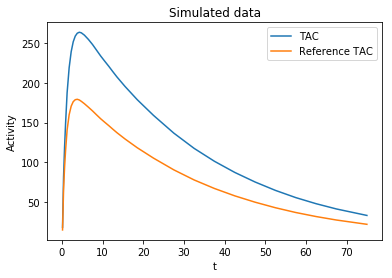

In [6]:
# generate noiseless fake data based on SRTM
BP = 0.5
R1 = 1.2
t, dt, TAC, refTAC = generate_fakeTAC_SRTM(BP, R1)

fig, ax = plt.subplots();
ax.plot(t, TAC, label='TAC');
ax.plot(t, refTAC, label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

In [8]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC, refTAC, time_unit='min')

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.49424358]),
 'R1': array([ 1.37144317]),
 'akaike': array([ 200.49529102]),
 'err': array([ 0.70365946]),
 'fpe': array([ 725.01206422]),
 'k2': array([ 0.48671459]),
 'logl': array([-96.24764551]),
 'mse': array([ 19.07926485])}

In [9]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC, refTAC, time_unit='min')

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519]),
 'R1': array([ 1.21159295]),
 'R1_lrsc': array([ nan]),
 'k2': array([ 1.16059185]),
 'k2_lrsc': array([ nan]),
 'k2a': array([ 0.7736839]),
 'k2a_lrsc': array([ nan]),
 'noiseVar_eqDVR': array([ 0.00020378]),
 'noiseVar_eqR1': array([ 0.00012201])}

In [10]:
# Generate noisy simulations by adding normal noise -- I don't think this is a good way
pct_noise = np.array([0, 5, 10, 15, 20, 25, 30])

TAC_matrix = TAC + np.random.normal(0,np.outer(TAC,pct_noise/100).T)

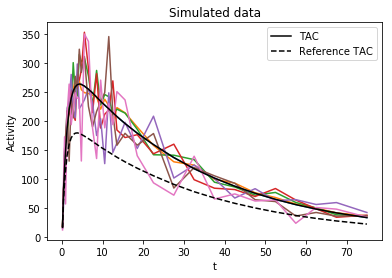

In [11]:
fig, ax = plt.subplots();
ax.plot(t, TAC_matrix.T, label='');
ax.plot(t, TAC, 'k-', label='TAC');
ax.plot(t, refTAC, 'k--', label='Reference TAC');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Simulated data');
ax.legend();

Experiment using noisy TAC and noiseless reference TAC

In [12]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC_matrix, refTAC, time_unit='min')

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([  0.49424363,   0.51719198,   0.54889264,  19.95752179,
         19.99997374,   0.42183023,   0.29942329]),
 'R1': array([ 1.37144323,  1.35237668,  1.5558891 ,  1.48302815,  1.35734216,
         1.48019349,  1.50187133]),
 'akaike': array([ 200.49510577,  253.64362983,  320.72223609,  336.4234398 ,
         336.16071346,  352.54514375,  370.74071043]),
 'err': array([ 0.70365754,  1.53768292,  4.12345817,  5.19468605,  5.17461407,
         6.58452064,  8.60458375]),
 'fpe': array([    725.00811102,    3462.21278798,   24896.79036626,
          39512.88915561,   39208.12783117,   63484.61682435,
         108412.63692197]),
 'k2': array([  4.86713850e-01,   3.54561804e-01,   5.13048641e-02,
          1.85933855e-04,   2.36735446e-03,   4.41253147e-02,
          1.01179293e-01]),
 'logl': array([ -96.24755289, -122.82181491, -156.36111804, -164.2117199 ,
        -164.08035673, -172.27257188, -181.37035522]),
 'mse': array([   19.07916082,    91.11086284,   655.17869385,  10

In [13]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC_matrix, refTAC, time_unit='min')

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.50008519,  0.51856247,  0.54840455,  0.47882456,  0.43385487,
         0.4286986 ,  0.31026328]),
 'R1': array([ 1.21159295,  1.40366854,  1.55293708,  1.48287216,  1.34935162,
         1.47182442,  1.42988254]),
 'R1_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2': array([ 1.16059185,  0.22388696,  0.02221107, -0.00316896,  0.01300472,
         0.01782411,  0.05296346]),
 'k2_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'k2a': array([ 0.7736839 ,  0.14705932,  0.01437241, -0.00225978,  0.00753389,
         0.01286493,  0.04118527]),
 'k2a_lrsc': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan]),
 'noiseVar_eqDVR': array([  2.03777753e-04,   9.95290603e+00,   2.33227947e+01,
          7.12931709e+01,   3.44191011e+02,   9.65653205e+01,
          3.46741451e+02]),
 'noiseVar_eqR1': array([  1.22013775e-04,   1.61283449e+00,   6.41365659e+00,
          1.40200075e+01,   1.86568689e+01,   2.20065010e+01,
          4.10936317e+01])}

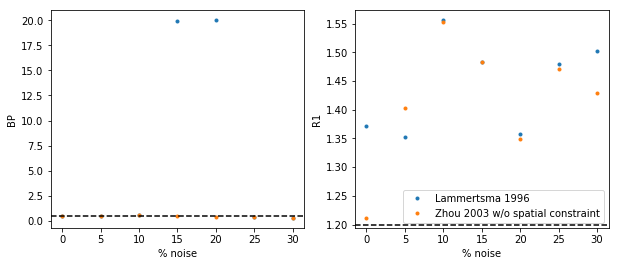

In [14]:
fig, axes = plt.subplots(1,2, figsize=(10,4));

axes[0].plot(pct_noise, mdl_lammertsma.results['BP'], '.', label='Lammertsma 1996');
axes[0].plot(pct_noise, mdl_zhou.results['BP'], '.', label='Zhou 2003 w/o spatial constraint');
axes[0].axhline(y=BP, color='k', linestyle='--');
axes[0].set_xlabel('% noise');
axes[0].set_ylabel('BP');
#axes[0].legend();

axes[1].plot(pct_noise, mdl_lammertsma.results['R1'], '.', label='Lammertsma 1996');
axes[1].plot(pct_noise, mdl_zhou.results['R1'], '.', label='Zhou 2003 w/o spatial constraint');
axes[1].axhline(y=R1, color='k', linestyle='--');
axes[1].set_xlabel('% noise');
axes[1].set_ylabel('R1');
axes[1].legend();